*   Multimídia - Imagem II (Exercício 5)

*   Felipe Daniel Dias dos Santos - 11711ECP004

*   Graduação em Engenharia de Computação - Faculdade de Engenharia Elétrica - Universidade Federal de Uberlândia

In [ ]:
#Função que calcula a matriz de coocorrência de uma imagem, dados os parâmetros de ângulo ("teta") e distância ("d")
def coocurrence(M, d, teta):

  #Obtenção das dimensões da imagem
  n_rows, n_columns = M.shape

  #Matriz de coocorrẽncia resultante
  P = np.zeros(M.shape)

  #Conversão do ângulo de entrada de grau para radiano
  teta = teta * (np.pi / 180)

  #Cálculo das distâncias percorridas em linha e coluna na matriz
  Dx = round(d * np.cos(teta)).astype('int')
  Dy = -round(d * np.sin(teta)).astype('int')

  #Laço que analisa toda a matriz, verificando todas as ocorrências simultâneas de dois níveis de cores, dados os parâmetros "Dx" e "Dy"
  for i in range(n_rows):

    for j in range(n_columns):

      #Cálculo das movimentações horizontais e verticais
      mov_hor = j + Dx 
      mov_vert = i + Dy

      #Verificação para assegurar que as movimentações realizadas não ultrapassem os limites da imagem 
      if (mov_hor >= 0) and (mov_hor <= n_columns - 1) and (mov_vert >= 0) and (mov_vert <= n_rows - 1):
        
        #Primeiro elemento de comparação
        elem_1 = M[i, j]

        #Segundo elemento de comparação, distânciado do primeiro elemento em "mov_vert" número de linhas e "mov_hor" número de colunas
        elem_2 = M[mov_vert, mov_hor]

        P[elem_1, elem_2] += 1

  #Retorno da matriz de coocorrência não normalizada
  return P

In [ ]:
#Função que calcula a média dos valores de uma matriz "P"
def mean(P):

  #Obtenção das dimensões da matriz
  n_rows, n_columns = P.shape

  #Obtenção da quantidade de elementos da matriz
  n = n_rows * n_columns

  return np.sum(P) / n

In [ ]:
#Função que calcula o desvio padrão dos valores de uma matriz "P"
def stdDev(P):

  #Obtenção das dimensões da matriz
  n_rows, n_columns = P.shape

  #Obtenção da quantidade de elementos da matriz
  n = n_rows * n_columns

  sum = 0.0

  #Cálculo da média
  m = mean(P)

  #Laço para o cálculo do desvio padrão
  for i in range(n_rows):

    for j in range(n_columns):

      sum = sum + (P[i, j] - m) ** 2

  return np.sqrt(sum / (n - 1))

In [ ]:
#Função que calcula o contraste de uma matriz de coocorrência "p"
def contrast(p):

  #Obtenção das dimensões da matriz
  n_rows, n_columns = p.shape

  sum = 0.0

  #Laço para o cálculo do contraste
  for i in range(n_rows):

    for j in range(n_columns):

      sum = sum + p[i, j] * (i - j) ** 2

  return sum

In [ ]:
#Função que calcula a homogeneidade de uma matriz de coocorrência "p"
def homogeneity(p):

  #Obtenção das dimensões da matriz
  n_rows, n_columns = p.shape

  sum = 0.0

  #Laço para o cálculo da homogeneidade
  for i in range(n_rows):

    for j in range(n_columns):

      den = 1 + (i - j) ** 2

      sum = sum + p[i, j] / den

  return sum

In [ ]:
#Função que calcula o segundo momento angular de uma matriz de coocorrência "p"
def asm(p):

  #Obtenção das dimensões da matriz
  n_rows, n_columns = p.shape

  sum = 0.0

  #Laço para o cálculo do segundo momento angular
  for i in range(n_rows):

    for j in range(n_columns):

      sum = sum + p[i, j] ** 2

  return sum

In [ ]:
#Função que calcula a entropia de uma matriz de coocorrência "p"
def entropy(p):

  #Obtenção das dimensões da matriz
  n_rows, n_columns = p.shape

  sum = 0.0

  #Laço para o cálculo da entropia
  for i in range(n_rows):

    for j in range(n_columns):

      if p[i, j] != 0:

        sum = sum - np.log(p[i, j]) * p[i, j]

  return sum

In [ ]:
#Função que calcula a média baseada na referência de uma matriz de coocorrência "p"
def meanI(p):

  #Obtenção das dimensões da matriz
  n_rows, n_columns = p.shape

  sum = 0.0

  #Laço para o cálculo da média
  for i in range(n_rows):

    for j in range(n_columns):

      sum = sum + i * p[i, j]

  return sum

In [ ]:
#Função que calcula a média baseada na vizinhança de uma matriz de coocorrência "p"
def meanJ(p):

  #Obtenção das dimensões da matriz
  n_rows, n_columns = p.shape

  sum = 0.0

  #Laço para o cálculo da média
  for i in range(n_rows):

    for j in range(n_columns):

      sum = sum + j * p[i, j]

  return sum

In [ ]:
#Função que calcula a variância baseada na referência de uma matriz de coocorrência "p"
def varianceI(p):

  #Obtenção das dimensões da matriz
  n_rows, n_columns = p.shape

  sum = 0.0

  #Cálculo da média baseada na referência
  m = meanI(p)

  #Laço para o cálculo da variância
  for i in range(n_rows):

    for j in range(n_columns):

      sum = sum + p[i, j] * (i - m) ** 2

  return sum

In [ ]:
#Função que calcula a variância baseada na vizinhança de uma matriz de coocorrência "p"
def varianceJ(p):

  #Obtenção das dimensões da matriz
  n_rows, n_columns = p.shape

  sum = 0.0

  #Cálculo da média baseada na vizinhança
  m = meanJ(p)

  #Laço para o cálculo da variância
  for i in range(n_rows):

    for j in range(n_columns):

      sum = sum + p[i, j] * (j - m) ** 2

  return sum

In [ ]:
#Função que calcula a variância baseada na referência de uma matriz de coocorrência "p"
def stdDevI(p):

  return np.sqrt(varianceI(p))

In [ ]:
#Função que calcula a variância baseada na vizinhança de uma matriz de coocorrência "p"
def stdDevJ(p):

  return np.sqrt(varianceJ(p))

In [ ]:
#Função que calcula a correlação de uma matriz de coocorrência "p"
def correlation(p):

  #Obtenção das dimensões da matriz
  n_rows, n_columns = p.shape

  sum = 0.0

  m_i = meanI(p)
  m_j = meanJ(p)

  sd_i = stdDevI(p)
  sd_j = stdDevJ(p)

  den = sd_i * sd_j

  #Laço para o cálculo da correlação
  for i in range(n_rows):

    for j in range(n_columns):

      num = (i - m_i) * (j - m_j)

      sum = sum + p[i, j] * (num / den)

  return sum

A partir das funções definidas acima, será selecionada um grupo de 4 imagens em nível de cinza que passarão pelo seguinte processo:

Serão calculadas as matrizes de coocorrência de cada uma em 16 configurações distintas (4 possibilidades de distância e 4 possibilidades de ângulo);

Serão calculadas as medidas de média e desvio padrão de cada matriz resultante e analisadas as variações de acorddo com as mudanças dos parâmetros;

Será selecionada uma matriz da coleção de 16 e, a partir da mesma, será realizado o processo de normalização e obtenção dos descritores de Haralick.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


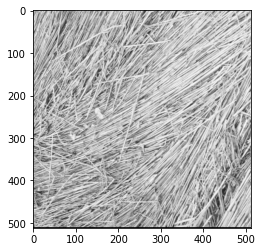

In [ ]:
#Imagem 01

#Declaração das bibliotecas necessárias, definição do diretório raíz e montagem do diretório
from google.colab import drive
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/Colab Notebooks/dados/textura/'

#Carregamento da imagem
im = Image.open(root_path + 'texture1.tiff')

#Conversão da imagem em matriz
pixel = asarray(im)

#Mostrar imagem original
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem 01

#Cálculo da média e desvio padrão para as 16 combinações de d e teta

#Configuração 01: d = 1, teta = 0
d = 1
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 01
conc_1 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 0:")
print("Média: ", mean(conc_1))
print("Desvio padrão: ", stdDev(conc_1))
print("\n")

#Configuração 02: d = 2, teta = 0
d = 2
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 02
conc_2 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 0:")
print("Média: ", mean(conc_2))
print("Desvio padrão: ", stdDev(conc_2))
print("\n")

#Configuração 03: d = 3, teta = 0
d = 3
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 03
conc_3 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 0:")
print("Média: ", mean(conc_3))
print("Desvio padrão: ", stdDev(conc_3))
print("\n")

#Configuração 04: d = 4, teta = 0
d = 4
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 04
conc_4 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 0:")
print("Média: ", mean(conc_4))
print("Desvio padrão: ", stdDev(conc_4))
print("\n")
print("\n")
print("\n")

#Configuração 05: d = 1, teta = 45
d = 1
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 05
conc_5 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 45:")
print("Média: ", mean(conc_5))
print("Desvio padrão: ", stdDevconc_5))
print("\n")

#Configuração 06: d = 2, teta = 45
d = 2
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 06
conc_6 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 45:")
print("Média: ", mean(conc_6))
print("Desvio padrão: ", stdDev(conc_6))
print("\n")

#Configuração 07: d = 3, teta = 45
d = 3
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 07
conc_7 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 45:")
print("Média: ", mean(conc_7))
print("Desvio padrão: ", stdDev(conc_7))
print("\n")

#Configuração 08: d = 4, teta = 45
d = 4
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 08
conc_8 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 45:")
print("Média: ", mean(conc_8))
print("Desvio padrão: ", stdDev(conc_8))
print("\n")
print("\n")
print("\n")

#Configuração 09: d = 1, teta = 90
d = 1
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 09
conc_9 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 90:")
print("Média: ", mean(conc_9))
print("Desvio padrão: ", stdDev(conc_9))
print("\n")

#Configuração 10: d = 2, teta = 90
d = 2
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 10
conc_10 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 90:")
print("Média: ", mean(conc_10))
print("Desvio padrão: ", stdDev(conc_10))
print("\n")

#Configuração 11: d = 3, teta = 90
d = 3
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 11
conc_11 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 90:")
print("Média: ", mean(conc_11))
print("Desvio padrão: ", stdDev(conc_11))
print("\n")

#Configuração 12: d = 4, teta = 90
d = 4
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 12
conc_12 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 90:")
print("Média: ", mean(conc_12))
print("Desvio padrão: ", stdDev(conc_12))
print("\n")
print("\n")
print("\n")

#Configuração 13: d = 1, teta = 135
d = 1
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 13
conc_13 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 135:")
print("Média: ", mean(conc_13))
print("Desvio padrão: ", stdDev(conc_13))
print("\n")

#Configuração 14: d = 2, teta = 135
d = 2
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 14
conc_14 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 135:")
print("Média: ", mean(conc_14))
print("Desvio padrão: ", stdDev(conc_14))
print("\n")

#Configuração 15: d = 3, teta = 135
d = 3
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 15
conc_15 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 135:")
print("Média: ", mean(conc_15))
print("Desvio padrão: ", stdDev(conc_15))
print("\n")

#Configuração 16: d = 4, teta = 135
d = 4
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 16
conc_16 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 135:")
print("Média: ", mean(conc_16))
print("Desvio padrão: ", stdDev(conc_16))

Para d = 1 e teta = 0:
Média:  0.998046875
Desvio padrão:  5.710278718924511


Para d = 2 e teta = 0:
Média:  0.99609375
Desvio padrão:  4.801893980436655


Para d = 3 e teta = 0:
Média:  0.994140625
Desvio padrão:  4.593708521714804


Para d = 4 e teta = 0:
Média:  0.9921875
Desvio padrão:  4.538560155399592






Para d = 1 e teta = 45:
Média:  0.9960975646972656
Desvio padrão:  6.270064327485415


Para d = 2 e teta = 45:
Média:  0.9960975646972656
Desvio padrão:  6.270064327485415


Para d = 3 e teta = 45:
Média:  0.9922027587890625
Desvio padrão:  4.878422972824861


Para d = 4 e teta = 45:
Média:  0.9883155822753906
Desvio padrão:  4.4396086164252555






Para d = 1 e teta = 90:
Média:  0.998046875
Desvio padrão:  5.451015018668742


Para d = 2 e teta = 90:
Média:  0.99609375
Desvio padrão:  4.366796625558015


Para d = 3 e teta = 90:
Média:  0.994140625
Desvio padrão:  4.1606286001422115


Para d = 4 e teta = 90:
Média:  0.9921875
Desvio padrão:  4.107347515479249






Para d =

Para a imagem 01, em relação a média, notamos que:

O aumento do ângulo causou uma oscilação da média, em que os pares de ângulos 0 e 90, 45 e 135 possuem o valor da média praticamente idênticos; 

O aumento da distância causou um decrescimo da média, sugerindo uma correlação inversa entre média e distância;

A média variou menos com a variação do ângulo do que com a variação da distância;

Logo, podemos concluir que, para essa imagem, a média é mais dependente da distância do que do ângulo.

Para a imagem 01, em relação ao desvio padrão, notamos que:

O aumento da distância causou um decrescimo do desvio padrão, sugerindo uma correlação inversa entre desvio padrão e distância;

O aumento do ângulo causou uma mudança ora crescente, ora decrescente no desvio padrão, sugerindo comportamento oscilante do desvio padrão em função do ângulo.

In [ ]:
#Imagem 01

#Cálculo dos descritores de Haralick para a configuração 01: d = 1, teta = 0

#Normalização da matriz de coocorrência da configuração 01
conc_1 = conc_1 / np.sum(conc_1)

#Descritores
print("Para d = 1 e teta = 0:")
print("Contraste: ", contrast(conc_1))
print("Homogeneidade: ", homogeneity(conc_1))
print("Segundo momento angular: ", asm(conc_1))
print("Entropia: ", entropy(conc_1))
print("Correlação: ", correlation(conc_1))

Para d = 1 e teta = 0:
Contraste:  735.9053861912932
Homogeneidade:  0.06167416144046352
Segundo momento angular:  0.00012868844798229342
Entropia:  9.401058509579954
Correlação:  0.7559395487524532


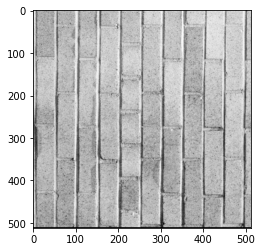

In [ ]:
#Imagem 02

#Carregamento da imagem
im = Image.open(root_path + 'texture2.tiff')

#Conversão da imagem em matriz
pixel = asarray(im)

#Mostrar imagem original
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem 02

#Cálculo da média e desvio padrão para as 16 combinações de d e teta

#Configuração 01: d = 1, teta = 0
d = 1
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 01
conc_1 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 0:")
print("Média: ", mean(conc_1))
print("Desvio padrão: ", stdDev(conc_1))
print("\n")

#Configuração 02: d = 2, teta = 0
d = 2
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 02
conc_2 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 0:")
print("Média: ", mean(conc_2))
print("Desvio padrão: ", stdDev(conc_2))
print("\n")

#Configuração 03: d = 3, teta = 0
d = 3
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 03
conc_3 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 0:")
print("Média: ", mean(conc_3))
print("Desvio padrão: ", stdDev(conc_3))
print("\n")

#Configuração 04: d = 4, teta = 0
d = 4
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 04
conc_4 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 0:")
print("Média: ", mean(conc_4))
print("Desvio padrão: ", stdDev(conc_4))
print("\n")
print("\n")
print("\n")

#Configuração 05: d = 1, teta = 45
d = 1
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 05
conc_5 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 45:")
print("Média: ", mean(conc_5))
print("Desvio padrão: ", stdDev(conc_5))
print("\n")

#Configuração 06: d = 2, teta = 45
d = 2
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 06
conc_6 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 45:")
print("Média: ", mean(conc_6))
print("Desvio padrão: ", stdDev(conc_6))
print("\n")

#Configuração 07: d = 3, teta = 45
d = 3
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 07
conc_7 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 45:")
print("Média: ", mean(conc_7))
print("Desvio padrão: ", stdDev(conc_7))
print("\n")

#Configuração 08: d = 4, teta = 45
d = 4
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 08
conc_8 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 45:")
print("Média: ", mean(conc_8))
print("Desvio padrão: ", stdDev(conc_8))
print("\n")
print("\n")
print("\n")

#Configuração 09: d = 1, teta = 90
d = 1
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 09
conc_9 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 90:")
print("Média: ", mean(conc_9))
print("Desvio padrão: ", stdDev(conc_9))
print("\n")

#Configuração 10: d = 2, teta = 90
d = 2
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 10
conc_10 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 90:")
print("Média: ", mean(conc_10))
print("Desvio padrão: ", stdDev(conc_10))
print("\n")

#Configuração 11: d = 3, teta = 90
d = 3
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 11
conc_11 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 90:")
print("Média: ", mean(conc_11))
print("Desvio padrão: ", stdDev(conc_11))
print("\n")

#Configuração 12: d = 4, teta = 90
d = 4
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 12
conc_12 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 90:")
print("Média: ", mean(conc_12))
print("Desvio padrão: ", stdDev(conc_12))
print("\n")
print("\n")
print("\n")

#Configuração 13: d = 1, teta = 135
d = 1
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 13
conc_13 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 135:")
print("Média: ", mean(conc_13))
print("Desvio padrão: ", stdDev(conc_13))
print("\n")

#Configuração 14: d = 2, teta = 135
d = 2
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 14
conc_14 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 135:")
print("Média: ", mean(conc_14))
print("Desvio padrão: ", stdDev(conc_14))
print("\n")

#Configuração 15: d = 3, teta = 135
d = 3
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 15
conc_15 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 135:")
print("Média: ", mean(conc_15))
print("Desvio padrão: ", stdDev(conc_15))
print("\n")

#Configuração 16: d = 4, teta = 135
d = 4
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 16
conc_16 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 135:")
print("Média: ", mean(conc_16))
print("Desvio padrão: ", stdDev(conc_16))

Para d = 1 e teta = 0:
Média:  0.998046875
Desvio padrão:  8.398311120876363


Para d = 2 e teta = 0:
Média:  0.99609375
Desvio padrão:  7.63853687477727


Para d = 3 e teta = 0:
Média:  0.994140625
Desvio padrão:  7.360242444577472


Para d = 4 e teta = 0:
Média:  0.9921875
Desvio padrão:  7.184623240429168






Para d = 1 e teta = 45:
Média:  0.9960975646972656
Desvio padrão:  7.853150268896327


Para d = 2 e teta = 45:
Média:  0.9960975646972656
Desvio padrão:  7.853150268896327


Para d = 3 e teta = 45:
Média:  0.9922027587890625
Desvio padrão:  7.1647172556536685


Para d = 4 e teta = 45:
Média:  0.9883155822753906
Desvio padrão:  6.9222026608273515






Para d = 1 e teta = 90:
Média:  0.998046875
Desvio padrão:  9.175420631587969


Para d = 2 e teta = 90:
Média:  0.99609375
Desvio padrão:  8.053953118554865


Para d = 3 e teta = 90:
Média:  0.994140625
Desvio padrão:  7.838720268769914


Para d = 4 e teta = 90:
Média:  0.9921875
Desvio padrão:  7.736927416800293






Para d = 

Para a imagem 02, em relação a média, notamos que:

O aumento do ângulo causou uma oscilação da média, em que os pares de ângulos 0 e 90, 45 e 135 possuem o valor da média praticamente idênticos; 

O aumento da distância causou um decrescimo da média, sugerindo uma correlação inversa entre média e distância;

A média variou menos com a variação do ângulo do que com a variação da distância;

Logo, podemos concluir que, para essa imagem, a média é mais dependente da distância do que do ângulo.

Para a imagem 02, em relação ao desvio padrão, notamos que:

O aumento da distância causou um decrescimo do desvio padrão, sugerindo uma correlação inversa entre desvio padrão e distância;

O aumento do ângulo causou uma mudança ora crescente, ora decrescente no desvio padrão, sugerindo comportamento oscilante do desvio padrão em função do ângulo.

In [ ]:
#Imagem 02

#Cálculo dos descritores de Haralick para a configuração 01: d = 1, teta = 0

#Normalização da matriz de coocorrência da configuração 01
conc_1 = conc_1 / np.sum(conc_1)

#Descritores
print("Para d = 1 e teta = 0:")
print("Contraste: ", contrast(conc_1))
print("Homogeneidade: ", homogeneity(conc_1))
print("Segundo momento angular: ", asm(conc_1))
print("Entropia: ", entropy(conc_1))
print("Correlação: ", correlation(conc_1))

Para d = 1 e teta = 0:
Contraste:  418.4559763331753
Homogeneidade:  0.09050022999796435
Segundo momento angular:  0.00027392457209842467
Entropia:  8.834227492516524
Correlação:  0.801291159104066


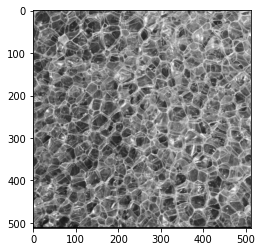

In [ ]:
#Imagem 03

#Carregamento da imagem
im = Image.open(root_path + 'texture3.tiff')

#Conversão da imagem em matriz
pixel = asarray(im)

#Mostrar imagem original
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem 03

#Cálculo da média e desvio padrão para as 16 combinações de d e teta

#Configuração 01: d = 1, teta = 0
d = 1
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 01
conc_1 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 0:")
print("Média: ", mean(conc_1))
print("Desvio padrão: ", stdDev(conc_1))
print("\n")

#Configuração 02: d = 2, teta = 0
d = 2
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 02
conc_2 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 0:")
print("Média: ", mean(conc_2))
print("Desvio padrão: ", stdDev(conc_2))
print("\n")

#Configuração 03: d = 3, teta = 0
d = 3
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 03
conc_3 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 0:")
print("Média: ", mean(conc_3))
print("Desvio padrão: ", stdDev(conc_3))
print("\n")

#Configuração 04: d = 4, teta = 0
d = 4
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 04
conc_4 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 0:")
print("Média: ", mean(conc_4))
print("Desvio padrão: ", stdDev(conc_4))
print("\n")
print("\n")
print("\n")

#Configuração 05: d = 1, teta = 45
d = 1
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 05
conc_5 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 45:")
print("Média: ", mean(conc_5))
print("Desvio padrão: ", stdDev(conc_5))
print("\n")

#Configuração 06: d = 2, teta = 45
d = 2
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 06
conc_6 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 45:")
print("Média: ", mean(conc_6))
print("Desvio padrão: ", stdDev(conc_6))
print("\n")

#Configuração 07: d = 3, teta = 45
d = 3
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 07
conc_7 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 45:")
print("Média: ", mean(conc_7))
print("Desvio padrão: ", stdDev(conc_7))
print("\n")

#Configuração 08: d = 4, teta = 45
d = 4
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 08
conc_8 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 45:")
print("Média: ", mean(conc_8))
print("Desvio padrão: ", stdDev(conc_8))
print("\n")
print("\n")
print("\n")

#Configuração 09: d = 1, teta = 90
d = 1
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 09
conc_9 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 90:")
print("Média: ", mean(conc_9))
print("Desvio padrão: ", stdDev(conc_9))
print("\n")

#Configuração 10: d = 2, teta = 90
d = 2
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 10
conc_10 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 90:")
print("Média: ", mean(conc_10))
print("Desvio padrão: ", stdDev(conc_10))
print("\n")

#Configuração 11: d = 3, teta = 90
d = 3
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 11
conc_11 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 90:")
print("Média: ", mean(conc_11))
print("Desvio padrão: ", stdDev(conc_11))
print("\n")

#Configuração 12: d = 4, teta = 90
d = 4
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 12
conc_12 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 90:")
print("Média: ", mean(conc_12))
print("Desvio padrão: ", stdDev(conc_12))
print("\n")
print("\n")
print("\n")

#Configuração 13: d = 1, teta = 135
d = 1
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 13
conc_13 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 135:")
print("Média: ", mean(conc_13))
print("Desvio padrão: ", stdDev(conc_13))
print("\n")

#Configuração 14: d = 2, teta = 135
d = 2
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 14
conc_14 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 135:")
print("Média: ", mean(conc_14))
print("Desvio padrão: ", stdDev(conc_14))
print("\n")

#Configuração 15: d = 3, teta = 135
d = 3
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 15
conc_15 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 135:")
print("Média: ", mean(conc_15))
print("Desvio padrão: ", stdDev(conc_15))
print("\n")

#Configuração 16: d = 4, teta = 135
d = 4
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 16
conc_16 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 135:")
print("Média: ", mean(conc_16))
print("Desvio padrão: ", stdDev(conc_16))

Para d = 1 e teta = 0:
Média:  0.998046875
Desvio padrão:  6.430629093901265


Para d = 2 e teta = 0:
Média:  0.99609375
Desvio padrão:  5.155750072591826


Para d = 3 e teta = 0:
Média:  0.994140625
Desvio padrão:  4.689460442517931


Para d = 4 e teta = 0:
Média:  0.9921875
Desvio padrão:  4.455736904311191






Para d = 1 e teta = 45:
Média:  0.9960975646972656
Desvio padrão:  5.411629105392838


Para d = 2 e teta = 45:
Média:  0.9960975646972656
Desvio padrão:  5.411629105392838


Para d = 3 e teta = 45:
Média:  0.9922027587890625
Desvio padrão:  4.307675797881017


Para d = 4 e teta = 45:
Média:  0.9883155822753906
Desvio padrão:  3.9651982472517435






Para d = 1 e teta = 90:
Média:  0.998046875
Desvio padrão:  6.063728056745219


Para d = 2 e teta = 90:
Média:  0.99609375
Desvio padrão:  4.652740445406291


Para d = 3 e teta = 90:
Média:  0.994140625
Desvio padrão:  4.189596785452639


Para d = 4 e teta = 90:
Média:  0.9921875
Desvio padrão:  3.965005250552881






Para d = 

Para a imagem 03, em relação a média, notamos que:

O aumento do ângulo causou uma oscilação da média, em que os pares de ângulos 0 e 90, 45 e 135 possuem o valor da média praticamente idênticos; 

O aumento da distância causou um decrescimo da média, sugerindo uma correlação inversa entre média e distância;

A média variou menos com a variação do ângulo do que com a variação da distância;

Logo, podemos concluir que, para essa imagem, a média é mais dependente da distância do que do ângulo.

Para a imagem 03, em relação ao desvio padrão, notamos que:

O aumento da distância causou um decrescimo do desvio padrão, sugerindo uma correlação inversa entre desvio padrão e distância;

O aumento do ângulo causou uma mudança ora crescente, ora decrescente no desvio padrão, sugerindo comportamento oscilante do desvio padrão em função do ângulo.

In [ ]:
#Imagem 03

#Cálculo dos descritores de Haralick para a configuração 01: d = 1, teta = 0

#Normalização da matriz de coocorrência da configuração 01
conc_1 = conc_1 / np.sum(conc_1)

#Descritores
print("Para d = 1 e teta = 0:")
print("Contraste: ", contrast(conc_1))
print("Homogeneidade: ", homogeneity(conc_1))
print("Segundo momento angular: ", asm(conc_1))
print("Entropia: ", entropy(conc_1))
print("Correlação: ", correlation(conc_1))

Para d = 1 e teta = 0:
Contraste:  363.9313386741752
Homogeneidade:  0.10653128494742592
Segundo momento angular:  0.00016218125068027912
Entropia:  9.171257995257765
Correlação:  0.8823388927737703


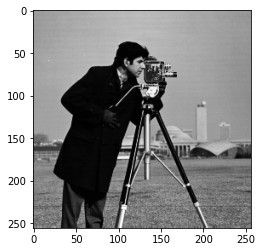

In [ ]:
#Imagem 04

#Carregamento da imagem
im = Image.open(root_path + 'cameraman.tif')

#Conversão da imagem em matriz
pixel = asarray(im)

#Mostrar imagem original
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem 04

#Cálculo da média e desvio padrão para as 16 combinações de d e teta

#Configuração 01: d = 1, teta = 0
d = 1
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 01
conc_1 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 0:")
print("Média: ", mean(conc_1))
print("Desvio padrão: ", stdDev(conc_1))
print("\n")

#Configuração 02: d = 2, teta = 0
d = 2
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 02
conc_2 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 0:")
print("Média: ", mean(conc_2))
print("Desvio padrão: ", stdDev(conc_2))
print("\n")

#Configuração 03: d = 3, teta = 0
d = 3
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 03
conc_3 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 0:")
print("Média: ", mean(conc_3))
print("Desvio padrão: ", stdDev(conc_3))
print("\n")

#Configuração 04: d = 4, teta = 0
d = 4
teta = 0

#Obtenção da matriz de coocorrência não normalizada para a configuração 04
conc_4 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 0:")
print("Média: ", mean(conc_4))
print("Desvio padrão: ", stdDev(conc_4))
print("\n")
print("\n")
print("\n")

#Configuração 05: d = 1, teta = 45
d = 1
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 05
conc_5 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 45:")
print("Média: ", mean(conc_5))
print("Desvio padrão: ", stdDev(conc_5))
print("\n")

#Configuração 06: d = 2, teta = 45
d = 2
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 06
conc_6 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 45:")
print("Média: ", mean(conc_6))
print("Desvio padrão: ", stdDev(conc_6))
print("\n")

#Configuração 07: d = 3, teta = 45
d = 3
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 07
conc_7 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 45:")
print("Média: ", mean(conc_7))
print("Desvio padrão: ", stdDev(conc_7))
print("\n")

#Configuração 08: d = 4, teta = 45
d = 4
teta = 45

#Obtenção da matriz de coocorrência não normalizada para a configuração 08
conc_8 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 45:")
print("Média: ", mean(conc_8))
print("Desvio padrão: ", stdDev(conc_8))
print("\n")
print("\n")
print("\n")

#Configuração 09: d = 1, teta = 90
d = 1
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 09
conc_9 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 90:")
print("Média: ", mean(conc_9))
print("Desvio padrão: ", stdDev(conc_9))
print("\n")

#Configuração 10: d = 2, teta = 90
d = 2
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 10
conc_10 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 90:")
print("Média: ", mean(conc_10))
print("Desvio padrão: ", stdDev(conc_10))
print("\n")

#Configuração 11: d = 3, teta = 90
d = 3
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 11
conc_11 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 90:")
print("Média: ", mean(conc_11))
print("Desvio padrão: ", stdDev(conc_11))
print("\n")

#Configuração 12: d = 4, teta = 90
d = 4
teta = 90

#Obtenção da matriz de coocorrência não normalizada para a configuração 12
conc_12 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 90:")
print("Média: ", mean(conc_12))
print("Desvio padrão: ", stdDev(conc_12))
print("\n")
print("\n")
print("\n")

#Configuração 13: d = 1, teta = 135
d = 1
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 13
conc_13 = coocurrence(pixel, d, teta)

print("Para d = 1 e teta = 135:")
print("Média: ", mean(conc_13))
print("Desvio padrão: ", stdDev(conc_13))
print("\n")

#Configuração 14: d = 2, teta = 135
d = 2
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 14
conc_14 = coocurrence(pixel, d, teta)

print("Para d = 2 e teta = 135:")
print("Média: ", mean(conc_14))
print("Desvio padrão: ", stdDev(conc_14))
print("\n")

#Configuração 15: d = 3, teta = 135
d = 3
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 15
conc_15 = coocurrence(pixel, d, teta)

print("Para d = 3 e teta = 135:")
print("Média: ", mean(conc_15))
print("Desvio padrão: ", stdDev(conc_15))
print("\n")

#Configuração 16: d = 4, teta = 135
d = 4
teta = 135

#Obtenção da matriz de coocorrência não normalizada para a configuração 16
conc_16 = coocurrence(pixel, d, teta)

print("Para d = 4 e teta = 135:")
print("Média: ", mean(conc_16))
print("Desvio padrão: ", stdDev(conc_16))

Para d = 1 e teta = 0:
Média:  0.99609375
Desvio padrão:  9.704089853460315


Para d = 2 e teta = 0:
Média:  0.9921875
Desvio padrão:  8.512652205842212


Para d = 3 e teta = 0:
Média:  0.98828125
Desvio padrão:  7.823367641514209


Para d = 4 e teta = 0:
Média:  0.984375
Desvio padrão:  7.346305207270338






Para d = 1 e teta = 45:
Média:  0.9922027587890625
Desvio padrão:  8.645949217218277


Para d = 2 e teta = 45:
Média:  0.9922027587890625
Desvio padrão:  8.645949217218277


Para d = 3 e teta = 45:
Média:  0.98443603515625
Desvio padrão:  7.605445645067265


Para d = 4 e teta = 45:
Média:  0.9766998291015625
Desvio padrão:  7.034531466550879






Para d = 1 e teta = 90:
Média:  0.99609375
Desvio padrão:  9.381219459827422


Para d = 2 e teta = 90:
Média:  0.9921875
Desvio padrão:  8.391989190088813


Para d = 3 e teta = 90:
Média:  0.98828125
Desvio padrão:  7.783810199918242


Para d = 4 e teta = 90:
Média:  0.984375
Desvio padrão:  7.471595202799369






Para d = 1 e teta = 

Para a imagem 04, em relação a média, notamos que:

O aumento do ângulo causou uma oscilação da média, em que os pares de ângulos 0 e 90, 45 e 135 possuem o valor da média praticamente idênticos; 

O aumento da distância causou um decrescimo da média, sugerindo uma correlação inversa entre média e distância;

A média variou menos com a variação do ângulo do que com a variação da distância;

Logo, podemos concluir que, para essa imagem, a média é mais dependente da distância do que do ângulo.

Para a imagem 04, em relação ao desvio padrão, notamos que:

O aumento da distância causou um decrescimo do desvio padrão, sugerindo uma correlação inversa entre desvio padrão e distância;

O aumento do ângulo causou uma mudança ora crescente, ora decrescente no desvio padrão, sugerindo comportamento oscilante do desvio padrão em função do ângulo.

In [ ]:
#Imagem 04

#Cálculo dos descritores de Haralick para a configuração 01: d = 1, teta = 0

#Normalização da matriz de coocorrência da configuração 01
conc_1 = conc_1 / np.sum(conc_1)

#Descritores
print("Para d = 1 e teta = 0:")
print("Contraste: ", contrast(conc_1))
print("Homogeneidade: ", homogeneity(conc_1))
print("Segundo momento angular: ", asm(conc_1))
print("Entropia: ", entropy(conc_1))
print("Correlação: ", correlation(conc_1))

Para d = 1 e teta = 0:
Contraste:  518.6035998774398
Homogeneidade:  0.3130929498376571
Segundo momento angular:  0.0014634390731631238
Entropia:  7.806546001201742
Correlação:  0.9334751147265761
